/Users/fangkeyuan/anaconda3/envs/gwsim/lib/python3.11/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


data type: <class 'numpy.ndarray'>
data shape: (2000, 8192)
inspecting row 1608: [ 1.23711677  0.78885053  2.48413562 ... -0.76863536  3.24951226
 -2.83039601]
mid row value: 4.634250194715719
data columns: 8192
   Unnamed: 0    event_time ifo   peak_time  peak_time_ns  start_time  \
0      403353  1.261942e+09  L1  1261941530     957031011  1261941530   
1      298687  1.251982e+09  L1  1251982056     995116949  1251982056   
2      283728  1.248640e+09  L1  1248640098     746093034  1248640098   
3      203867  1.243418e+09  L1  1243418038     441406011  1243418038   
4      359761  1.267482e+09  L1  1267481673     359375000  1267481673   

   start_time_ns  duration  peak_frequency  central_freq  ...         Tomte  \
0      875000000   0.18750       39.789299     51.306911  ...  1.368267e-01   
1      988281011   0.01172     1229.363159   1217.868530  ...  1.912738e-04   
2      687500000   0.12500       39.789299     56.314560  ...  1.692398e-02   
3      250000000   0.37500       

/Users/fangkeyuan/anaconda3/envs/gwsim/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: TimeSeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(
/Users/fangkeyuan/anaconda3/envs/gwsim/lib/python3.11/site-packages/pycbc/waveform/plugin.py:99: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/fangkeyuan/anaconda3/envs/gwsim/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


succesfully loaded Deepextractor model from /Users/fangkeyuan/Desktop/2025F/ML/gw3/mytest/glitchstream_kfang/glitchstream/deepextractor/checkpoints/DeepExtractor_257/checkpoint_best_real_noise_base.pth.tar 
succesfully loaded scaler from /Users/fangkeyuan/Desktop/2025F/ML/gw3/mytest/glitchstream_kfang/glitchstream/deepextractor/checkpoints/scaler.pkl 


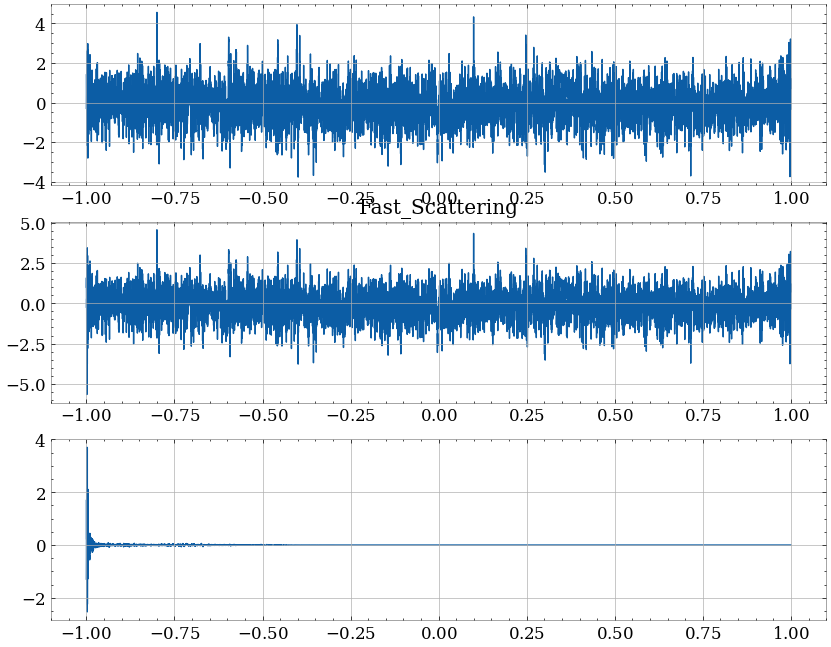

In [ ]:
import numpy as np
import pandas as pd
import pathlib
import matplotlib.pyplot as plt

from glitchstream.glitch_downloader import GlitchDownloader
from glitchstream.deepextractor import DeepExtractor

base_dir = pathlib.Path('./sample_glitches')

data = np.concatenate([np.load(base_dir / 'random_glitches_all_classes_0_g_hats.npy',allow_pickle=True),np.load(base_dir / 'random_glitches_all_classes_1_g_hats.npy',allow_pickle=True)])

print(f"data type: {type(data)}")
print(f"data shape: {data.shape}")

# randrow = np.random.randint(0, data.shape[0]-1)
# print(f"inspecting row {randrow}: {data[randrow]}")
# print(f"mid row value: {data[randrow][data.shape[1]//2]}")
# print(f"data columns: {data.shape[1]}")

metadatas = []
metadata_0 = pd.read_csv(base_dir / 'random_glitches_all_classes_0_metadataframe.csv')
metadata_1 = pd.read_csv(base_dir / 'random_glitches_all_classes_1_metadataframe.csv')
metadatas.append(metadata_0)
metadatas.append(metadata_1)
metadatas_df = pd.DataFrame(pd.concat(metadatas, ignore_index=True))

print(metadata_0.head())
entry_1 = metadata_0.iloc[0]
print(f"entry 1 glitch type: {entry_1['ml_label']}")

print("testing if ghat from .npy corresponds to metadata entry")
randrow = np.random.randint(0, data.shape[0])
print(f"retriving row {randrow}")
#print("fixing row number 1887")
#randrow = 1887
ghat_1 = data[randrow]

glitch_downloader = GlitchDownloader()
gps_time = metadatas_df.iloc[randrow]['event_time']
ifo = metadatas_df.iloc[randrow]['ifo']

psd,glitch_timeseries,glitch = glitch_downloader.get_glitch(gps_time=gps_time, ifo=ifo)
deepextractor = DeepExtractor()
ghat_2,n_hat_2 = deepextractor(glitch)

t = np.linspace(-1, 1, num=8192)

fig, axs = plt.subplots(3,1, figsize=(10,8))
axs[0].plot(t, ghat_1)
axs[1].plot(t, ghat_2)
axs[1].set_title(f"{metadatas_df.iloc[randrow]['ml_label']}")
axs[2].plot(t, ghat_1 - ghat_2)
plt.show()

shape of data after PCA: (2000, 20)
shape of unormalized data after PCA: (2000, 20)


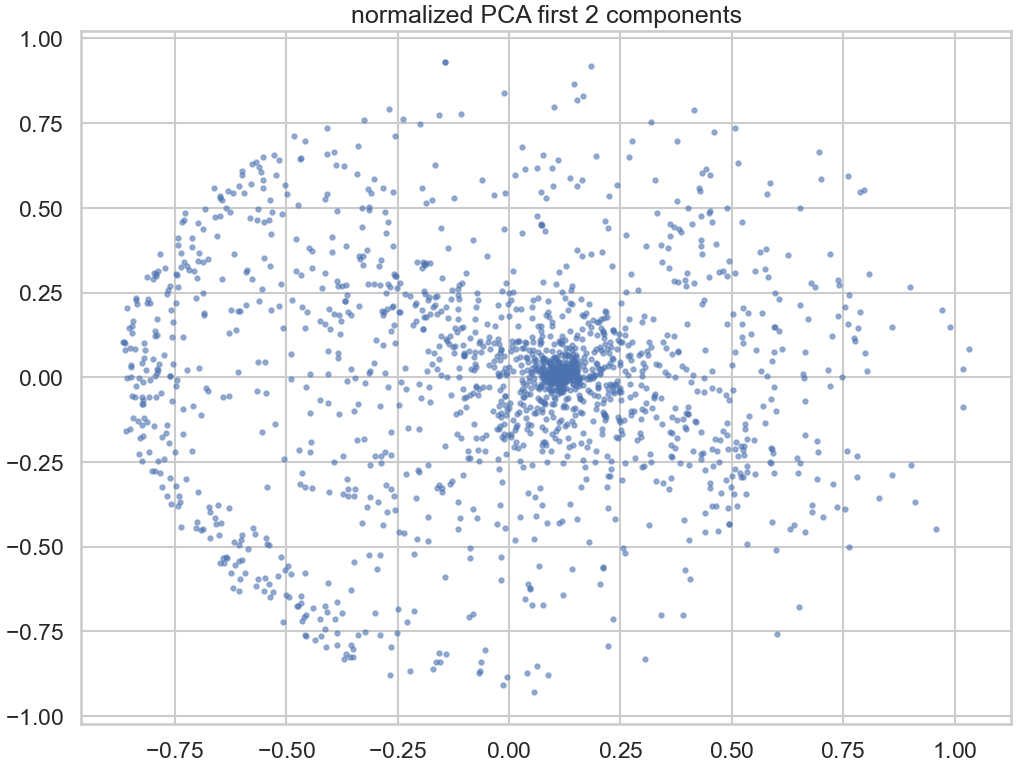

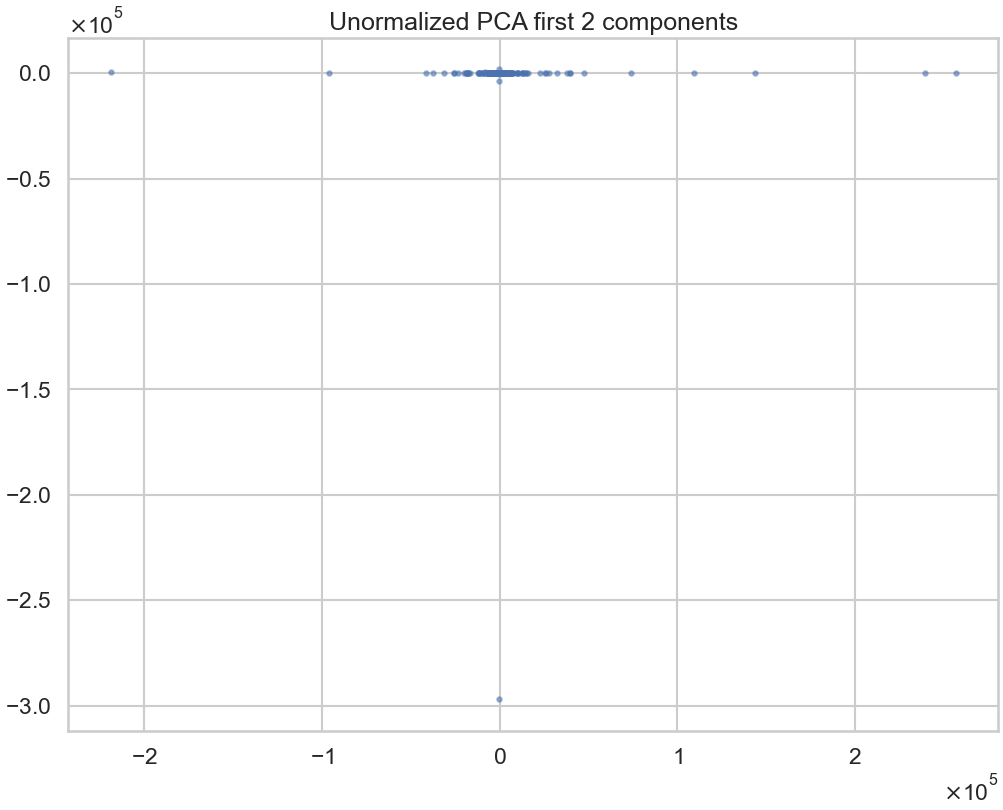

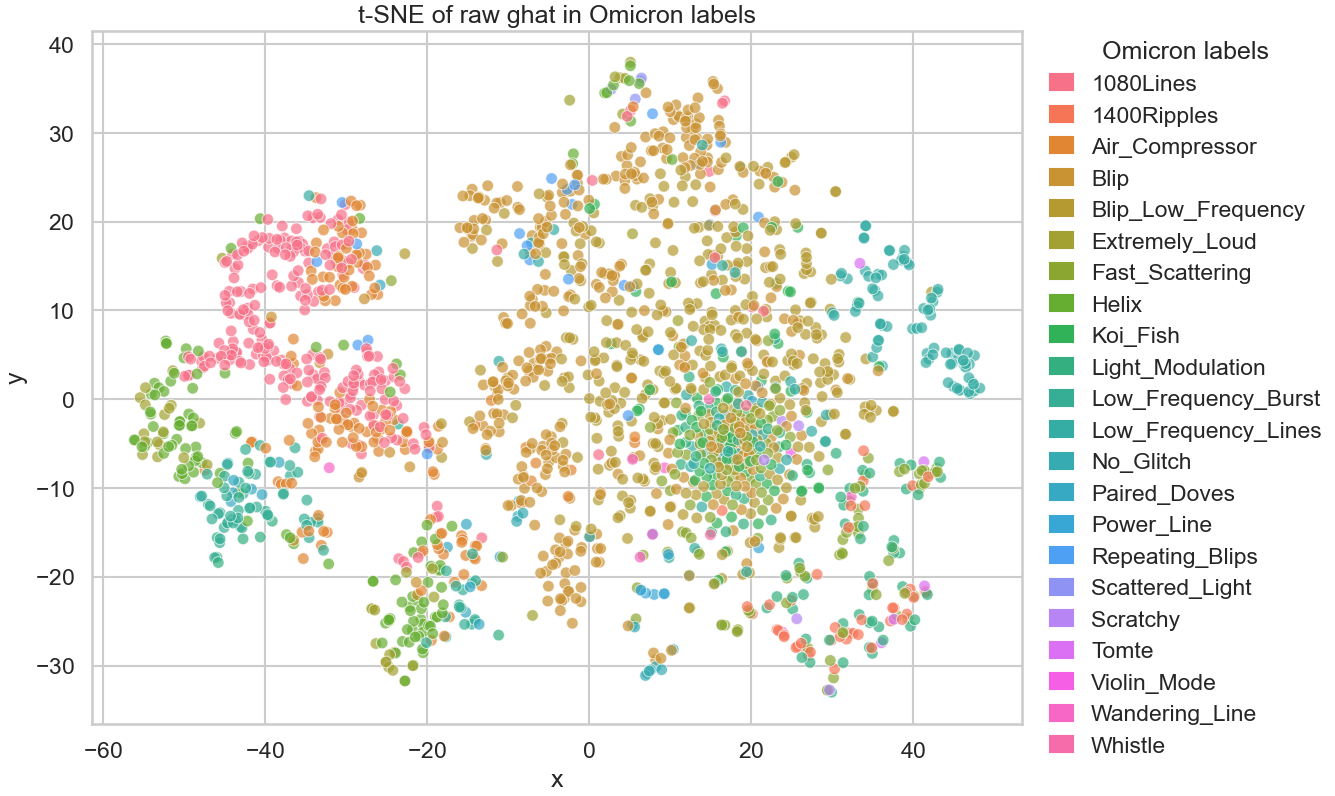

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.patches as mpatches


X_raw = data
X_normalized = normalize(X_raw,axis=1,norm='l2')

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_normalized)
pca_prime = PCA(n_components=20)
X_pca_unormalized = pca_prime.fit_transform(X_raw)

print(f"shape of data after PCA: {X_pca.shape}")
print(f"shape of unormalized data after PCA: {X_pca_unormalized.shape}")

plt.figure(figsize=(12,9))
plt.scatter(X_pca[:,0],X_pca[:,1],alpha=0.5,s=10)
plt.title("normalized PCA first 2 components")
plt.show()

plt.figure(figsize=(12,9))
plt.scatter(X_pca_unormalized[:,0],X_pca_unormalized[:,1],alpha=0.5,s=10)
plt.title("Unormalized PCA first 2 components")
plt.show()

ghat_label = metadatas_df['ml_label'].to_numpy()
le = LabelEncoder()
labels_coded = le.fit_transform(ghat_label)



def plot_tsne(X_raw):
	plt.figure(figsize=(12,9))

	tsne_1 = TSNE(n_components=2,perplexity=30,random_state=42)
	X_tsne_1 = tsne_1.fit_transform(X_raw)

	#colors = plt.get_cmap('gist_rainbow')(np.linspace(0,0.95,len(le.classes_)))
	#colors_remap = [colors[labels_coded[i]] for i in range(len(labels_coded))]

	#sns.set(style="whitegrid", context="talk")
	palette = sns.color_palette("husl",len(le.classes_))
	colors_remap = dict(zip(le.classes_,palette))
	legend_handles = []
	for label in le.classes_:
		patch = mpatches.Patch(color=colors_remap[label],label=label)
		legend_handles.append(patch)
	df_sns = pd.DataFrame({
		'x':X_tsne_1[:,0],
		'y':X_tsne_1[:,1],
		'labels': ghat_label
	})
	sca = sns.scatterplot(data=df_sns,x='x',y='y',hue='labels',palette=palette,s=70,alpha=0.7,edgecolor='w')
	sca.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title="Omicron labels",handles=legend_handles)
	plt.title("t-SNE of raw ghat in Omicron labels")
	# scatter = plt.scatter(X_tsne_1[:,0],X_tsne_1[:,1],c=colors_remap,alpha=0.6,s=50)
	# plt.title('tSNE on raw data with original Omicron labels')

	# handles,_ = scatter.legend_elements()
	# plt.legend(handles,le.classes_,title='Omicron Labels',bbox_to_anchor=(1.05, 1), loc='upper left')
	# plt.grid(True, alpha=0.3)
	# plt.tight_layout()
	plt.show()

plot_tsne(X_raw)



In [ ]:
print(len(labels_coded))
print(len(np.unique(labels_coded)))
print(X_tsne_1.shape)
print(np.unique(ghat_label))

print(labels_coded[:10])
print(len(le.classes_))

print(type(le.classes_))

print(data.shape)





TypeError: 'int' object is not callable

['1080Lines' '1400Ripples' 'Air_Compressor' 'Blip'
 'Blip_Low_Frequency' 'Extremely_Loud' 'Fast_Scattering' 'Helix'
 'Koi_Fish' 'Light_Modulation' 'Low_Frequency_Burst'
 'Low_Frequency_Lines' 'No_Glitch' 'Paired_Doves' 'Power_Line'
 'Repeating_Blips' 'Scattered_Light' 'Scratchy' 'Tomte'
 'Violin_Mode' 'Wandering_Line' 'Whistle']


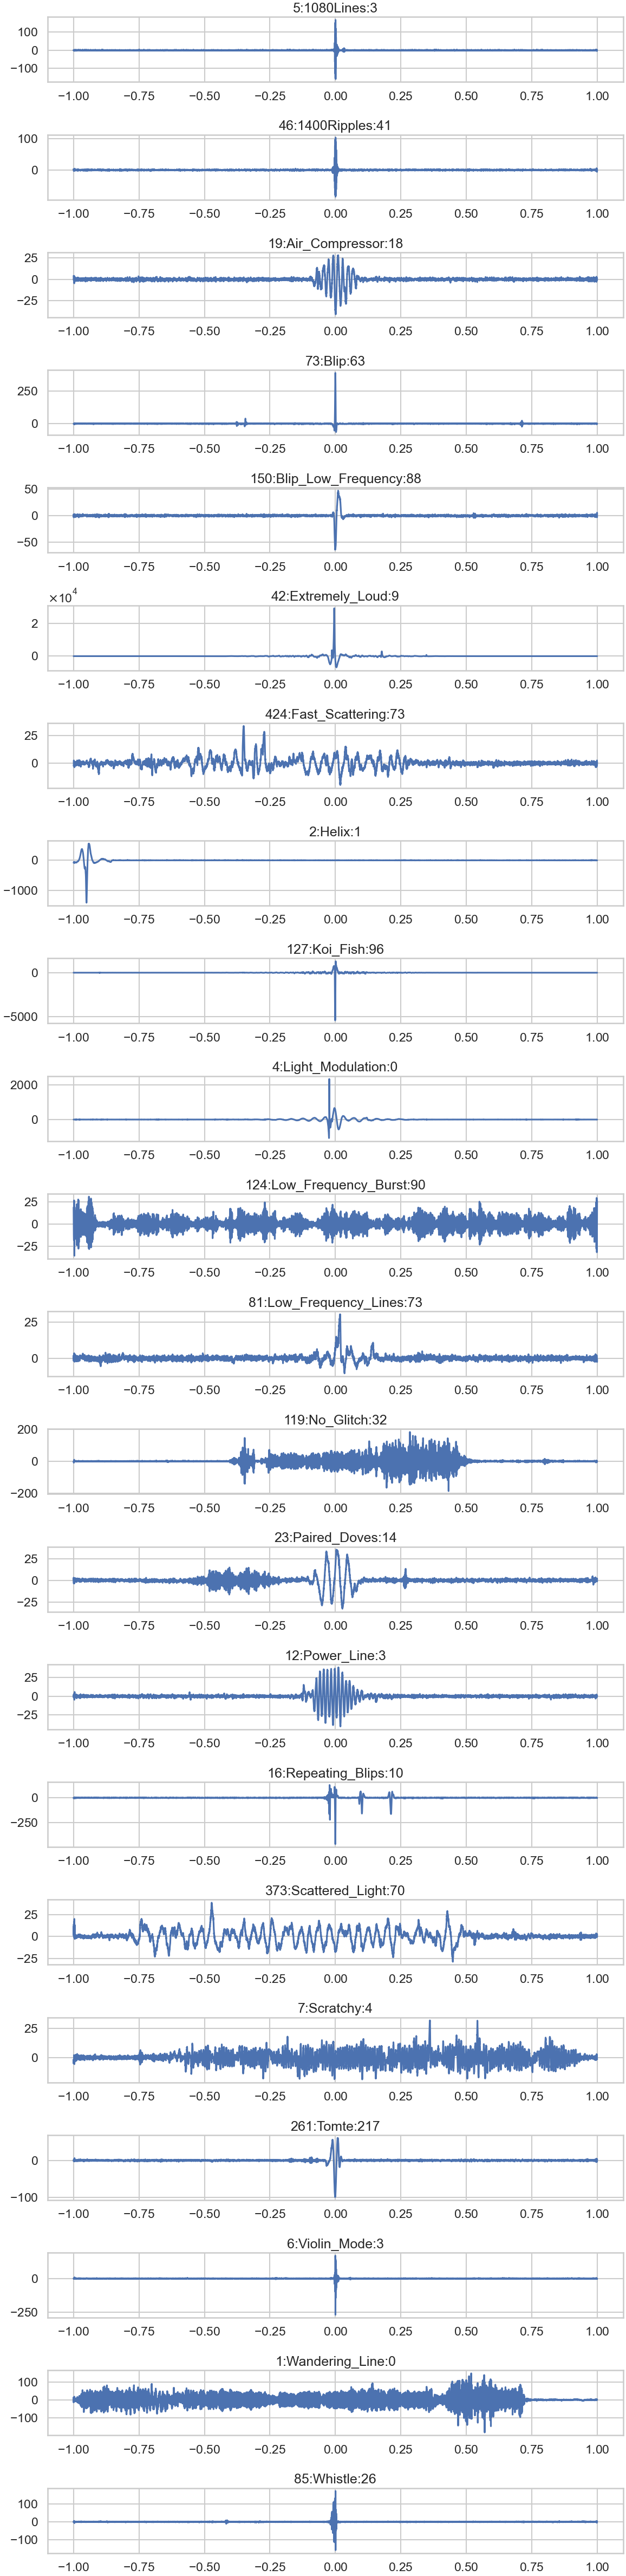

2000


In [121]:
df_glitch_labeled = pd.DataFrame({'ghat':list(data),'label':ghat_label})

label_uq = np.unique(ghat_label)
print(label_uq)

df_glitch_subgroups = []
for label in label_uq:
	subgroup = df_glitch_labeled[df_glitch_labeled['label'] == label]
	#subgroup.reset_index()
	df_glitch_subgroups.append(subgroup)

seed = np.random.seed(None)
t = np.linspace(-1,1,8192)
_,axs = plt.subplots(22,1,figsize=(12,48))
sum=0
for i in range(len(df_glitch_subgroups)):
	randrow = np.random.randint(len(df_glitch_subgroups[i]))
	random_glitch = df_glitch_subgroups[i].iloc[randrow].ghat
	axs[i].plot(t,random_glitch)
	axs[i].set_title(f'{len(df_glitch_subgroups[i])}:{df_glitch_subgroups[i].iloc[randrow].label}:{randrow}')
	sum+=len(df_glitch_subgroups[i])
plt.tight_layout()
plt.show()
print(sum)

In [ ]:
target_labels = ['Blip','Koi_Fish','Scattered_Light','Tomte']

df_filtered = [
	df for df in df_glitch_subgroups
	if df['label'].unique()[0] in target_labels
]

print(len(df_filtered))

# np.random.seed(None)
# _,axs = plt.subplots(4,1,figsize=(12,12))
# for idx in range(len(df_filtered)):
# 	t=np.linspace(-1,1,8192)
# 	randrow = np.random.randint(len(df_filtered[idx]))
# 	randglitch = df_filtered[idx].iloc[randrow].ghat
# 	axs[idx].plot(t,randglitch)
# 	axs[idx].set_title(df_filtered[idx][0].label)

# plt.tight_layout()
# plt.show()

127

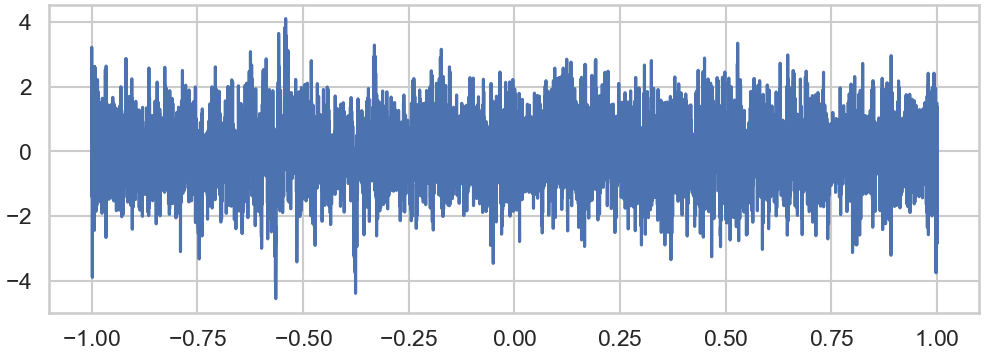

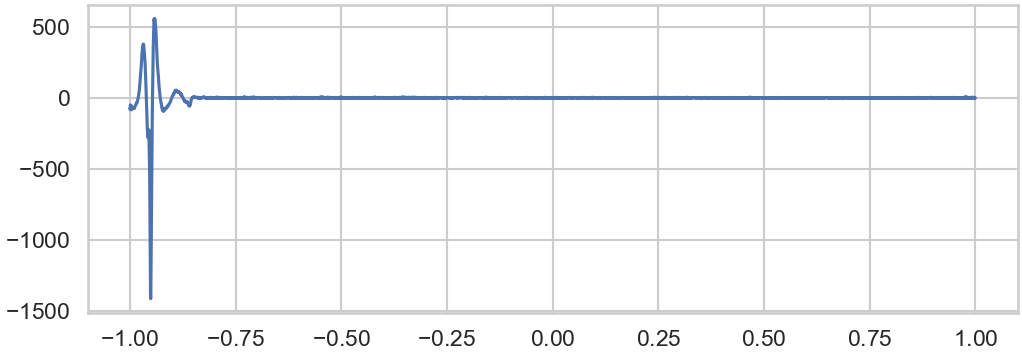

In [126]:
randlabel=label_uq[np.random.randint(len(label_uq))]
sub1 = df_glitch_labeled[df_glitch_labeled['label']=='Helix']

for i in range(len(sub1)):
	t=np.linspace(-1,1,8192)
	plt.figure(figsize=(12,4))
	plt.plot(t,sub1.iloc[i].ghat)
	plt.show()


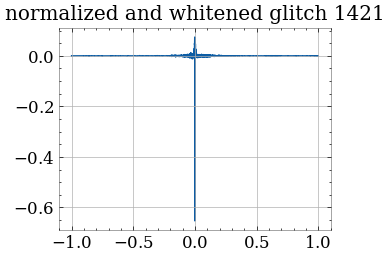

normalized and whitened glitch timedomain signal square sum: 0.9999999999999989


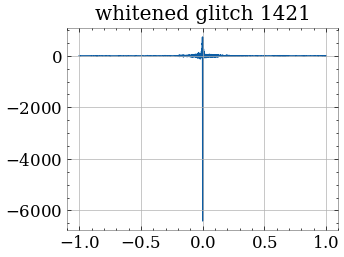

whitened glitch timedomain signal square sum: 96152419.40642184


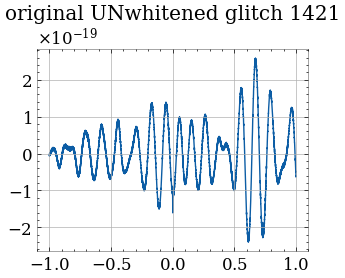

UNnormalized UNwhitened glitch timedomain signal square sum: 5.221624001117371e-35


In [35]:
#randrow = np.random.randint(0,X_normalized.shape[0] -1)
t = np.linspace(-1,1,8192)

plt.plot(t,X_normalized[randrow])
plt.title(f"normalized and whitened glitch {randrow}")
plt.show()
print(f"normalized and whitened glitch timedomain signal square sum: {sum(X_normalized[randrow]**2)}")

plt.plot(t,X_raw[randrow])
plt.title(f"whitened glitch {randrow}")
plt.show()
print(f"whitened glitch timedomain signal square sum: {sum(X_raw[randrow]**2)}")

glitch_timeseries_cropped = glitch_timeseries.crop(glitch_downloader.pad,glitch_downloader.pad)
plt.plot(t,np.asarray(glitch_timeseries_cropped))
plt.title(f"original UNwhitened glitch {randrow}")
plt.show()
print(f"UNnormalized UNwhitened glitch timedomain signal square sum: {sum(np.asarray(glitch_timeseries_cropped)**2)}")

In [41]:
print(pca.explained_variance_ratio_[0:5])
print(pca_prime.explained_variance_ratio_[0:5])

[0.13285435 0.08382104 0.0461309  0.03216324 0.02652655]
[0.4956084  0.18048731 0.08471928 0.05671975 0.04640941]


In [11]:
X_reconstructed = pca.inverse_transform(X_pca)
loss = np.mean((X_normalized - X_reconstructed) ** 2)
print(loss)

1.2018599436018007e-05


number of clusters: 8
noise points: 1495


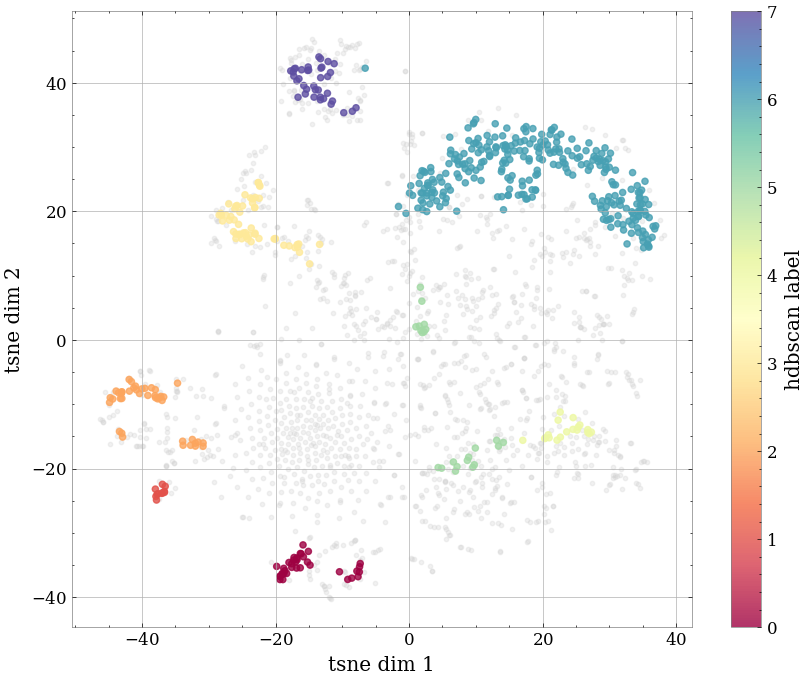

In [ ]:
from sklearn.cluster import HDBSCAN
from sklearn.manifold import TSNE

hdbscan = HDBSCAN(min_cluster_size=10,max_cluster_size=100)
y_labels_hdbscan = hdbscan.fit_predict(X_pca)

n_clusters = len(set(y_labels_hdbscan)) - (1 if -1 in y_labels_hdbscan else 0)
n_noise = list(y_labels_hdbscan).count(-1)

print(f"number of clusters: {n_clusters}")
print(f"noise points: {n_noise}")

tsne = TSNE(n_components=2,perplexity=30,random_state=42)
X_tsne = tsne.fit_transform(X_pca)

plt.figure(figsize=(10,8))
noise_mask = y_labels_hdbscan == -1
plt.scatter(X_tsne[noise_mask,0],X_tsne[noise_mask,1],c='lightgray',s=10,alpha=0.3)

cluster_mask = ~noise_mask
scatter = plt.scatter(X_tsne[cluster_mask,0],X_tsne[cluster_mask,1],c=y_labels_hdbscan[cluster_mask],cmap='Spectral',s=20,alpha=0.8)
plt.xlabel('tsne dim 1')
plt.ylabel('tsne dim 2')
plt.colorbar(scatter,label='hdbscan label')
#plt.legend()
plt.show()



number of clusters: 2
noise points: 975


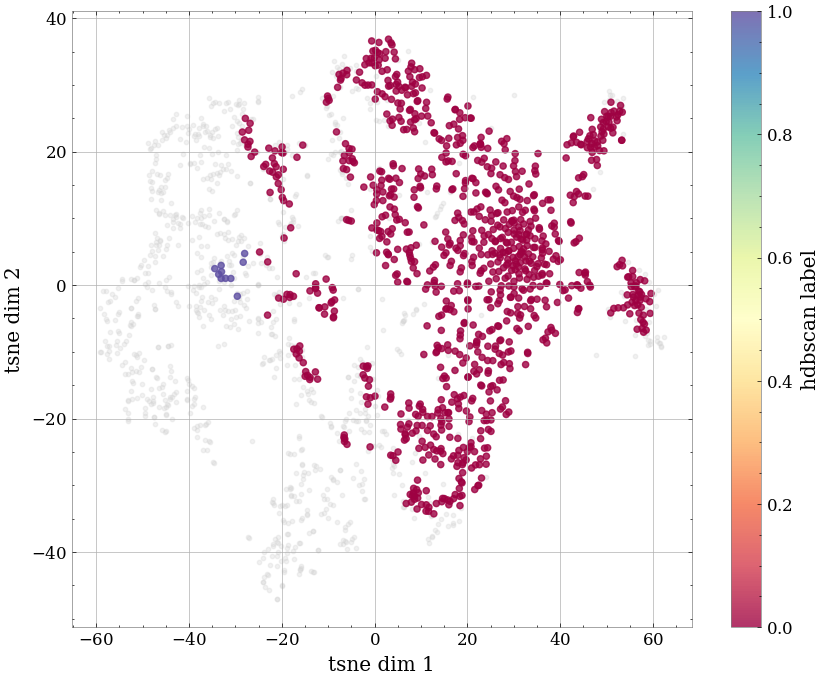

In [42]:
from sklearn.cluster import HDBSCAN
from sklearn.manifold import TSNE

hdbscan = HDBSCAN(min_cluster_size=10)
y_labels_hdbscan = hdbscan.fit_predict(X_pca_unormalized)

n_clusters = len(set(y_labels_hdbscan)) - (1 if -1 in y_labels_hdbscan else 0)
n_noise = list(y_labels_hdbscan).count(-1)

print(f"number of clusters: {n_clusters}")
print(f"noise points: {n_noise}")

tsne = TSNE(n_components=2,perplexity=30,random_state=42)
X_tsne = tsne.fit_transform(X_pca_unormalized)

plt.figure(figsize=(10,8))
noise_mask = y_labels_hdbscan == -1
plt.scatter(X_tsne[noise_mask,0],X_tsne[noise_mask,1],c='lightgray',s=10,alpha=0.3)

cluster_mask = ~noise_mask
scatter = plt.scatter(X_tsne[cluster_mask,0],X_tsne[cluster_mask,1],c=y_labels_hdbscan[cluster_mask],cmap='Spectral',s=20,alpha=0.8)
plt.xlabel('tsne dim 1')
plt.ylabel('tsne dim 2')
plt.colorbar(scatter,label='hdbscan label')
#plt.legend()
plt.show()

